In [1]:
%matplotlib inline

In [2]:
from dipy.reconst.dti import fractional_anisotropy, color_fa
from argparse import ArgumentParser
from scipy import ndimage
import os
import re
import numpy as np
import nibabel as nb
import sys
import matplotlib

matplotlib.use('Agg')  # very important above pyplot import
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
cd

/root


In [4]:
ls

Aut1367.nii              prototyping.ipynb
Final Downsampled.ipynb  result/
Final Notebook.ipynb     sample0.tiff
TIFF_stack/              sample1.tiff
Untitled-Copy1.ipynb     sample2.tiff
Untitled.ipynb           sample3.tiff
bigtiff/                 seelviz/
final.ipynb              tensor_rgb_upper.nii.gz
index.html               tmp/
miniTIFF/                v100_ch0_tensorfsl_dogsig1_gausig2.3.nii
pipeline.ipynb


In [5]:
cd result

/root/result


In [6]:
from dipy.reconst.dti import from_lower_triangular


In [9]:
ls

v100_ch0_tensordtk_dogsig1_gausig2.3_tensor.nii
v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [10]:
img = nb.load('v100_ch0_tensorfsl_dogsig1_gausig2.3.nii')

In [11]:
data = img.get_data()


In [12]:
output = from_lower_triangular(data)

In [13]:
output_ds = output[4250:4300, 250:300, :, :, :]

In [14]:

print output.shape
print output_ds.shape

(92, 60, 6, 3, 3)
(0, 0, 6, 3, 3)


In [15]:
FA = fractional_anisotropy(output_ds)

In [16]:
FA = np.clip(FA, 0, 1)

In [17]:
FA[np.isnan(FA)] = 0

In [18]:

print FA.shape

(0, 0, 6, 3)


In [19]:

from dipy.reconst.dti import decompose_tensor

In [20]:
evalues, evectors = decompose_tensor(output_ds)

In [21]:
print evectors[..., 0, 0].shape
print evectors.shape[-2:]

(0, 0, 6)
(3, 3)


In [22]:
print FA[:, :, :, 0].shape

(0, 0, 6)


In [23]:
RGB = color_fa(FA[:, :, :, 0], evectors)

In [24]:
nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), img.get_affine()), 'tensor_rgb_upper.nii.gz')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [25]:
def plot_rgb(im):
    plt.rcParams.update({'axes.labelsize': 'x-large',
                         'axes.titlesize': 'x-large'})

    if im.shape == (182, 218, 182):
        x = [78, 90, 100]
        y = [82, 107, 142]
        z = [88, 103, 107]
    else:
        shap = im.shape
        x = [int(shap[0]*0.35), int(shap[0]*0.51), int(shap[0]*0.65)]
        y = [int(shap[1]*0.35), int(shap[1]*0.51), int(shap[1]*0.65)]
        z = [int(shap[2]*0.35), int(shap[2]*0.51), int(shap[2]*0.65)]
    coords = (x, y, z)

    labs = ['Sagittal Slice (YZ fixed)',
            'Coronal Slice (XZ fixed)',
            'Axial Slice (XY fixed)']
    var = ['X', 'Y', 'Z']

    idx = 0
    for i, coord in enumerate(coords):
        for pos in coord:
            idx += 1
            ax = plt.subplot(3, 3, idx)
            ax.set_title(var[i] + " = " + str(pos))
            if i == 0:
                image = ndimage.rotate(im[pos, :, :], 90)
            elif i == 1:
                image = ndimage.rotate(im[:, pos, :], 90)
            else:
                image = im[:, :, pos]

            if idx % 3 == 1:
                ax.set_ylabel(labs[i])
                ax.yaxis.set_ticks([0, image.shape[0]/2, image.shape[0] - 1])
                ax.xaxis.set_ticks([0, image.shape[1]/2, image.shape[1] - 1])

            plt.imshow(image)

    fig = plt.gcf()
    fig.set_size_inches(12.5, 10.5, forward=True)
    return fig

In [26]:
affine = img.get_affine()

fa = nb.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
im = fa.get_data()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [27]:
print np.asarray(fa)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (0, 0, 6, 3)
affine: 
[[ 1.  0.  0.  1.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [4 0 0 6 3 1 1 1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d   

IndexError: index 0 is out of bounds for axis 0 with size 0

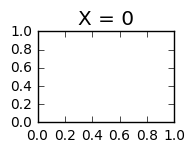

In [28]:
fig = plot_rgb(im)

In [29]:
import os

In [43]:
ls

gradient_amplitudes.nii  sample5.tiff
gradient_vectors.nii     slice_0dogsigma_0gausigma_0tensorfsl.nii
sample0.tiff             slice_1dogsigma_0gausigma_0tensorfsl.nii
sample1.tiff             slice_2dogsigma_0gausigma_0tensorfsl.nii
sample2.tiff             slice_3dogsigma_0gausigma_0tensorfsl.nii
sample3.tiff             slice_4dogsigma_0gausigma_0tensorfsl.nii
sample4.tiff             slice_5dogsigma_0gausigma_0tensorfsl.nii


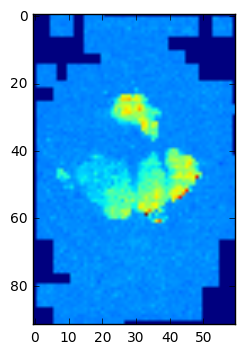

In [44]:
from PIL import Image
im = plt.imread('sample3.tiff') 
plt.imshow(im)